In [1]:

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
import seaborn as sn

In [2]:
df=pd.read_csv('countyData2019.csv')
headers = df.iloc[0]
dfc=pd.DataFrame(df.values[1:], columns=headers)


In [3]:
df=pd.read_csv('additionalCountyData2019.csv')
headers = df.iloc[0]
dfca=pd.DataFrame(df.values[1:], columns=headers)


In [4]:
df=pd.read_csv('moreCountyData2019.csv')
dfcma=df


In [5]:
dfI=pd.read_csv('CountyIncome2019.csv')
headersB=dfI.iloc[2]
dfI=pd.DataFrame(dfI.values[3:], columns=headersB)
dfI.drop(dfI.index[dfI['County FIPS Code'] == '000'], inplace = True)
dfI=dfI.reset_index()


In [6]:
#county=dfc[['County', 'Average Daily PM2.5','Income Ratio', '% Unemployed' ]]
#county= pd.concat([county, dfI['Median Household Income'], dfcma[['% Food Insecure','% Limited Access','% Insufficient Sleep','% Rural','Population']],dfca['Life Expectancy']], axis=1)
county=dfc[['County', 'Average Daily PM2.5','Income Ratio', '% Unemployed', '% With Access' ]]
county= pd.concat([county, dfI['Median Household Income'], dfcma[[ '% Limited Access','% Insufficient Sleep','% Rural','% African American' ,'% Asian', '% Hispanic', 'Population']],dfca['Life Expectancy']], axis=1)
#county=dfc[['County', 'Average Daily PM2.5' ]]
#county= pd.concat([county, dfI['Median Household Income'], dfcma[['% Insufficient Sleep','Population']],dfca['Life Expectancy']], axis=1)

#dfI['Median Household Income']
#dfca['Life Expectancy']


In [7]:
county=county.dropna(axis=0).reset_index(drop=True)
countyNew=county.drop(['County'],axis=1)
countyNew=countyNew.astype(float)
countyNew

,Average Daily PM2.5,Income Ratio,% Unemployed,% With Access,Median Household Income,% Limited Access,% Insufficient Sleep,% Rural,% African American,% Asian,% Hispanic,Population,Life Expectancy
0,11.7,4.6,3.9,69.0,58233.0,12.0,36.0,42.0,19.3,1.3,2.9,55504.0,76.3
1,10.3,4.5,4.0,72.0,59871.0,5.0,33.0,42.3,9.0,1.2,4.6,212628.0,78.6
2,11.5,5.8,5.9,54.0,35972.0,11.0,39.0,67.8,47.9,0.5,4.2,25270.0,75.8
3,11.2,4.3,4.4,16.0,47918.0,3.0,38.0,68.4,21.5,0.2,2.6,22668.0,73.9
4,11.7,4.1,4.0,23.0,52902.0,3.0,36.0,90.0,1.5,0.3,9.6,58013.0,74.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,5.1,4.4,4.6,90.0,80639.0,11.0,31.0,10.9,1.1,0.8,16.2,43534.0,77.8
3020,4.9,3.9,3.0,100.0,98837.0,7.0,27.0,46.4,0.5,1.2,15.0,23265.0,87.4
3021,5.9,4.6,4.5,81.0,70756.0,10.0,31.0,43.1,0.7,0.5,9.2,20495.0,78.4
3022,4.8,3.6,4.1,82.0,55122.0,4.0,28.0,36.0,0.5,0.8,14.2,8064.0,80.5


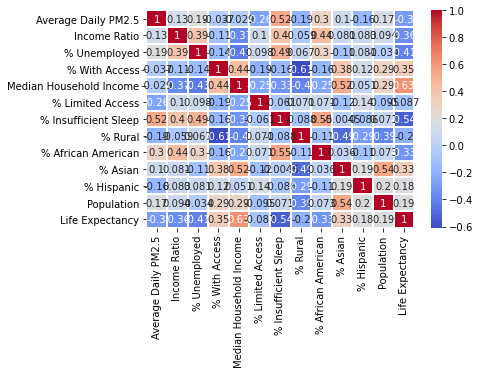

In [8]:
corrMatrix = countyNew.corr()
hm=sn.heatmap(corrMatrix, annot=True, xticklabels=True, yticklabels=True, cmap='coolwarm', linecolor='white', linewidths=1)
figure = hm.get_figure()    
figure.savefig('svm_conf.png',dpi=600)


In [9]:
countyNew=shuffle(countyNew)
countyNew['Population'].median()

27052.5

In [10]:
fullSet=countyNew
trainingSet=countyNew.sample(frac=.8)
part_40=countyNew.drop(trainingSet.index)
validationSet=part_40.sample(frac=.5)
testSet=part_40.drop(validationSet.index)
trainingSet

,Average Daily PM2.5,Income Ratio,% Unemployed,% With Access,Median Household Income,% Limited Access,% Insufficient Sleep,% Rural,% African American,% Asian,% Hispanic,Population,Life Expectancy
423,11.3,4.5,4.3,32.0,74052.0,0.0,34.0,96.7,16.5,1.1,3.7,33915.0,80.1
1735,6.7,4.5,6.1,54.0,43135.0,15.0,34.0,29.6,3.4,1.5,38.4,65817.0,77.7
1342,7.5,4.1,4.4,74.0,57290.0,1.0,31.0,59.1,0.7,1.3,24.8,10840.0,80.1
2657,8.8,6.6,11.0,34.0,35821.0,9.0,36.0,34.6,1.9,0.9,88.3,21584.0,78.4
1221,7.5,3.7,4.9,54.0,72888.0,1.0,30.0,91.3,0.6,0.6,4.4,21657.0,83.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,5.6,3.9,2.4,36.0,47602.0,15.0,31.0,100.0,0.5,0.4,22.0,2154.0,75.9
1792,9.7,5.4,4.4,95.0,99831.0,3.0,35.0,0.7,11.5,6.5,18.0,328868.0,83.3
1750,8.5,4.1,6.7,57.0,49411.0,3.0,36.0,78.7,1.3,1.3,1.6,46894.0,78.5
1997,11.2,4.0,6.5,70.0,56704.0,4.0,38.0,50.3,1.2,0.4,6.6,58494.0,76.9


In [11]:
scalerA = preprocessing.StandardScaler()
scalerB=preprocessing.StandardScaler()

In [12]:
lengthTrain=len(trainingSet.index)
xtrain=np.ones((lengthTrain,len(trainingSet.columns)))
#put training set feature data into xtrain and make it normalized using min max scaler
xstats=scalerA.fit(fullSet[fullSet.columns[0:-1]].values.astype(float)) 
xtrain=scalerA.transform(trainingSet[trainingSet.columns[0:-1]].values.astype(float)) 

#we normalize life expectancy
ystats=scalerB.fit(fullSet[['Life Expectancy']].values.astype(float))
ytrain=scalerB.transform(trainingSet[['Life Expectancy']].values.astype(float))
print(scalerA.mean_, '\n',scalerB.mean_,'\n')
xtrain

[9.08131614e+00 4.52364418e+00 4.59656085e+00 6.34884259e+01
 5.55946825e+04 8.05059524e+00 3.31286376e+01 5.74864749e+01
 9.19474206e+00 1.46200397e+00 9.49232804e+00 1.06822289e+05] 
 [77.44398148] 



array([[ 1.1509135 , -0.03222088, -0.19045673, ..., -0.14527885,
        -0.4188941 , -0.21539134],
       [-1.23527689, -0.03222088,  0.96553575, ...,  0.01524851,
         2.09056757, -0.12114267],
       [-0.82028726, -0.57731698, -0.12623492, ..., -0.06501517,
         1.10703216, -0.28356223],
       ...,
       [-0.30155021, -0.57731698,  1.35086657, ..., -0.06501517,
        -0.57076353, -0.17704724],
       [ 1.0990398 , -0.71359101,  1.22242296, ..., -0.42620174,
        -0.20916964, -0.14277715],
       [-0.40529762,  2.14816355, -0.57578755, ...,  1.86131316,
         0.02225046,  0.4730505 ]])

In [13]:
xval=np.ones((len(validationSet.index),len(validationSet.columns)))

xval=scalerA.transform(validationSet[validationSet.columns[0:-1]].values.astype(float)) 

yval=scalerB.transform(validationSet[['Life Expectancy']].values.astype(float))
xval

array([[ 0.58030276,  0.51287523, -0.12623492, ..., -0.10514701,
        -0.02837269, -0.12699813],
       [-0.97590837, -1.25868711, -0.64000935, ..., -0.34593806,
        -0.02114081, -0.27165928],
       [ 0.73592387, -0.03222088,  0.38753951, ..., -0.06501517,
         0.70204699, -0.13705759],
       ...,
       [ 0.37280794,  1.19424536,  2.18575003, ..., -0.3860699 ,
        -0.59245917, -0.23983537],
       [ 0.26906053,  2.4207116 ,  2.44263724, ..., -0.50646542,
        -0.62861856, -0.29617717],
       [ 0.11343942,  0.24032718, -0.83267477, ..., -0.42620174,
        -0.54183602, -0.29204408]])

In [14]:
xtest=np.ones((len(testSet.index),len(testSet.columns)))

xtest=scalerA.transform(testSet[testSet.columns[0:-1]].values.astype(float)) 

ytest=scalerB.transform(testSet[['Life Expectancy']].values.astype(float))
xtest

array([[ 0.89154498, -0.98613906, -1.21800559, ..., -0.34593806,
        -0.51290851, -0.25879027],
       [-0.24967651,  0.24032718, -0.44734394, ..., -0.50646542,
        -0.53460414, -0.2633222 ],
       [ 0.00969201, -0.1684949 ,  1.60775379, ..., -0.42620174,
        -0.62861856, -0.24160205],
       ...,
       [ 0.63217646,  0.10405315,  0.38753951, ..., -0.14527885,
        -0.56353166,  0.29683723],
       [ 0.06156572, -0.03222088, -0.06201312, ..., -0.50646542,
        -0.45505349, -0.3062898 ],
       [ 0.11343942, -1.53123517, -0.64000935, ...,  0.13564403,
        -0.39719846, -0.04526101]])

In [15]:
def within_range_percent(ypred,yreal):
    return np.count_nonzero(abs(ypred-yreal)<1.5)/len(ypred)

In [16]:
#LIN REG 1

reg=LinearRegression().fit(xtrain,ytrain)
r2=reg.score(xtrain,ytrain)
print(r2,'\n')


0.5520734721531262 



0.6432410086812732 



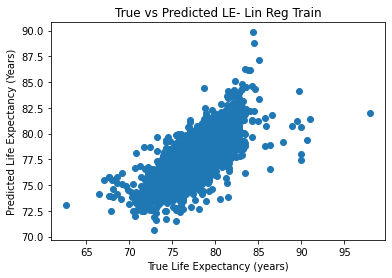

In [17]:
ynewreal=scalerB.inverse_transform(ytrain)
ynewpred=scalerB.inverse_transform(reg.predict(xtrain))

print(within_range_percent(ynewreal,ynewpred),'\n')
plt.plot(ynewreal,ynewpred,'o')
plt.xlabel('True Life Expectancy (years)')
plt.ylabel('Predicted Life Expectancy (Years)')
plt.title('True vs Predicted LE- Lin Reg Train')
plt.savefig('LinearRegTrain.png')

0.5672533593836979 

0.6225165562913907 



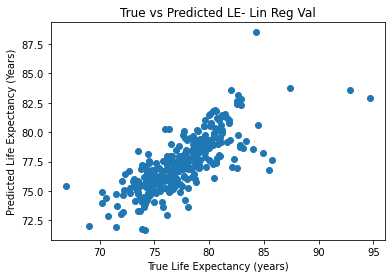

In [18]:
r2=reg.score(xval,yval)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(yval)
ynewpred=scalerB.inverse_transform(reg.predict(xval))

print(within_range_percent(ynewreal,ynewpred),'\n')

plt.plot(ynewreal,ynewpred,'o')
plt.xlabel('True Life Expectancy (years)')
plt.ylabel('Predicted Life Expectancy (Years)')
plt.title('True vs Predicted LE- Lin Reg Val')
plt.savefig('LinearRegVal.png')

0.6384716085995408 

0.6808598594460521 



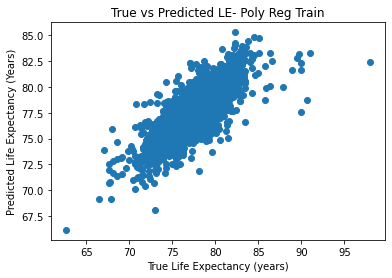

In [19]:
#LIN REG 2
poly = PolynomialFeatures(2)
model=LinearRegression()
xtrainpoly=poly.fit_transform(xtrain)
regB=model.fit(xtrainpoly,ytrain)

r2=regB.score(xtrainpoly,ytrain)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(ytrain)
ynewpred=scalerB.inverse_transform(regB.predict(xtrainpoly))

print(within_range_percent(ynewreal,ynewpred),'\n')

plt.plot(ynewreal,ynewpred,'o')
plt.xlabel('True Life Expectancy (years)')
plt.ylabel('Predicted Life Expectancy (Years)')
plt.title('True vs Predicted LE- Poly Reg Train')
plt.savefig('PolyRegTrain.png')

0.601609969954948 

0.6456953642384106 



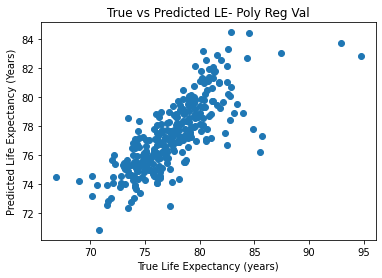

In [20]:
poly = PolynomialFeatures(2)
xvalpoly=poly.fit_transform(xval)
r2=regB.score(xvalpoly,yval)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(yval)
ynewpred=scalerB.inverse_transform(regB.predict(xvalpoly))

print(within_range_percent(ynewreal,ynewpred),'\n')


plt.plot(ynewreal,ynewpred,'o')
plt.xlabel('True Life Expectancy (years)')
plt.ylabel('Predicted Life Expectancy (Years)')
plt.title('True vs Predicted LE- Poly Reg Val')
plt.savefig('PolyRegVal.png')


In [21]:
#LIN REG 3
poly = PolynomialFeatures(3)
model=LinearRegression()
xtrainpoly=poly.fit_transform(xtrain)
regB=model.fit(xtrainpoly,ytrain)


r2=regB.score(xtrainpoly,ytrain)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(ytrain)
ynewpred=scalerB.inverse_transform(regB.predict(xtrainpoly))

print(within_range_percent(ynewreal,ynewpred),'\n')


0.7416424003677042 

0.7420421661843737 



In [22]:
poly = PolynomialFeatures(3)
xvalpoly=poly.fit_transform(xval)
regB.score(xvalpoly,yval)

r2=regB.score(xvalpoly,yval)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(yval)
ynewpred=scalerB.inverse_transform(regB.predict(xvalpoly))

print(within_range_percent(ynewreal,ynewpred),'\n')

0.04823679711046691 

0.5993377483443708 



In [23]:
#LIN REG 4
poly = PolynomialFeatures(4)
model=LinearRegression()
xtrainpoly=poly.fit_transform(xtrain)
regB=model.fit(xtrainpoly,ytrain)
regB.score(xtrainpoly,ytrain)


r2=regB.score(xtrainpoly,ytrain)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(ytrain)
ynewpred=scalerB.inverse_transform(regB.predict(xtrainpoly))

print(within_range_percent(ynewreal,ynewpred),'\n')

0.9389029123624955 

0.9433650268706076 



In [24]:
poly = PolynomialFeatures(4)
xvalpoly=poly.fit_transform(xval)
regB.score(xvalpoly,yval)

r2=regB.score(xvalpoly,yval)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(yval)
ynewpred=scalerB.inverse_transform(regB.predict(xvalpoly))

print(within_range_percent(ynewreal,ynewpred),'\n')

-1751.4889362076199 

0.3211920529801324 



In [25]:
#RIDGE REG 1
model=RidgeCV(alphas=[.1,.4,.2,.25,.05,.5,1,.15,.08,2])
model.n_iter=10^5
clf = model.fit(xtrain, ytrain)



In [26]:
r2=clf.score(xtrain,ytrain)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(ytrain)
ynewpred=scalerB.inverse_transform(clf.predict(xtrain))

print(within_range_percent(ynewreal,ynewpred),'\n')

0.5520731478473042 

0.6432410086812732 



In [27]:
r2=clf.score(xval,yval)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(yval)
ynewpred=scalerB.inverse_transform(clf.predict(xval))

print(within_range_percent(ynewreal,ynewpred),'\n')

0.5671648519169954 

0.6192052980132451 



In [28]:
#RIDGE REG 2
model=RidgeCV(alphas=[.1,.4,.2,.25,.05,.5,1,.15,.08,2])
model.n_iter=10^5
poly = PolynomialFeatures(2)
xtrainpoly=poly.fit_transform(xtrain)
regB=model.fit(xtrainpoly,ytrain)
r2=regB.score(xtrainpoly,ytrain)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(ytrain)
ynewpred=scalerB.inverse_transform(regB.predict(xtrainpoly))

print(within_range_percent(ynewreal,ynewpred),'\n')

0.638460044431732 

0.6800330715171559 



In [29]:
poly = PolynomialFeatures(2)
xvalpoly=poly.fit_transform(xval)
r2=regB.score(xvalpoly,yval)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(yval)
ynewpred=scalerB.inverse_transform(regB.predict(xvalpoly))

print(within_range_percent(ynewreal,ynewpred),'\n')

0.6020015549651809 

0.6456953642384106 



In [30]:
model=RidgeCV(alphas=[.1,.4,.2,.25,.05,.5,1,.15,.08,2,3.1,3.3,3.5,3.7,3.8,4,4.1])
model.n_iter=10^8
poly = PolynomialFeatures(3)
xtrainpoly=poly.fit_transform(xtrain)
regB=model.fit(xtrainpoly,ytrain)

regB=model.fit(xtrainpoly,ytrain)
r2=regB.score(xtrainpoly,ytrain)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(ytrain)
ynewpred=scalerB.inverse_transform(regB.predict(xtrainpoly))

print(within_range_percent(ynewreal,ynewpred),'\n')

0.7416356826963408 

0.7416287722199256 



In [31]:
poly = PolynomialFeatures(3)
xvalpoly=poly.fit_transform(xval)
r2=regB.score(xvalpoly,yval)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(yval)
ynewpred=scalerB.inverse_transform(regB.predict(xvalpoly))

print(within_range_percent(ynewreal,ynewpred),'\n')

0.05191280544706689 

0.5993377483443708 



In [32]:
model=RidgeCV(alphas=[.8,1,1.2,1.4,2,3,4,4.5,5,5.7,5.8,7])
model.n_iter=10^8
poly = PolynomialFeatures(4)
xtrainpoly=poly.fit_transform(xtrain)
regB=model.fit(xtrainpoly,ytrain)



In [33]:
poly = PolynomialFeatures(4)
xvalpoly=poly.fit_transform(xval)


0.8533768676012152 

0.8354692021496486 



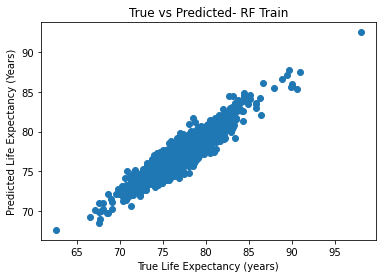

In [34]:
clfB= RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)
clfB.fit(xtrain,ytrain.ravel())
r2=clfB.score(xtrain,ytrain)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(ytrain)
ynewpred=scalerB.inverse_transform(clfB.predict(xtrain))

print(within_range_percent(ynewreal.ravel(),np.transpose(ynewpred)),'\n')

plt.plot(ynewreal,ynewpred,'o')
plt.xlabel('True Life Expectancy (years)')
plt.ylabel('Predicted Life Expectancy (Years)')
plt.title('True vs Predicted- RF Train')
plt.savefig('RFTrain.png')


0.6299465442695223 

0.6192052980132451 



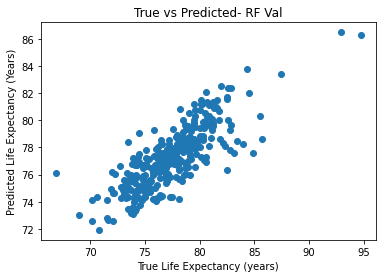

In [35]:

r2=clfB.score(xval,yval)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(yval)
ynewpred=scalerB.inverse_transform(clfB.predict(xval))

print(within_range_percent(ynewreal.ravel(),np.transpose(ynewpred)),'\n')

plt.plot(ynewreal,ynewpred,'o')
plt.xlabel('True Life Expectancy (years)')
plt.ylabel('Predicted Life Expectancy (Years)')
plt.title('True vs Predicted- RF Val')
plt.savefig('RFVal.png')


In [36]:
clfB= RandomForestRegressor(n_estimators=200, max_depth=10, random_state=0)
clfB.fit(xtrain,ytrain.ravel())
r2=clfB.score(xtrain,ytrain)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(ytrain)
ynewpred=scalerB.inverse_transform(clfB.predict(xtrain))

print(within_range_percent(ynewreal.ravel(),np.transpose(ynewpred)),'\n')

0.8547594084645852 

0.8350558081852005 



In [37]:
r2=clfB.score(xval,yval.ravel())
print(r2,'\n')

ynewreal=scalerB.inverse_transform(yval)
ynewpred=scalerB.inverse_transform(clfB.predict(xval))

print(within_range_percent(ynewreal.ravel(),np.transpose(ynewpred)),'\n')

0.6258344652410941 

0.6158940397350994 



In [38]:
clfB= RandomForestRegressor(n_estimators=300, max_depth=10, random_state=0)
clfB.fit(xtrain,ytrain.ravel())
r2=clfB.score(xtrain,ytrain.ravel())
print(r2,'\n')

ynewreal=scalerB.inverse_transform(ytrain)
ynewpred=scalerB.inverse_transform(clfB.predict(xtrain))

print(within_range_percent(ynewreal.ravel(),np.transpose(ynewpred)),'\n')



0.8549216709201829 

0.8305084745762712 



In [39]:
r2=clfB.score(xval,yval)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(yval)
ynewpred=scalerB.inverse_transform(clfB.predict(xval))

print(within_range_percent(ynewreal.ravel(),np.transpose(ynewpred)),'\n')

0.6229635128065028 

0.6059602649006622 

